In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
#Import Libraries
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

In [ ]:
#Dataset path and create df
dataset = '/content/drive/MyDrive/F_Expr/fer2013.csv'
columns=['emotion','pixels','usage']
rd_dataset = pd.read_csv('/content/drive/MyDrive/F_Expr/fer2013.csv',names=columns)
images=rd_dataset['pixels']

In [ ]:
#Form data: Split and form train samples - labels
def formData(dataset):
  X_init = []
  y_init = []
  first = True

  for row in open(dataset):
    if first:
      first = False
    else:
      elements = row.split(',')
      y_init.append(int(elements[0]))
      X_init.append([int(pixel) for pixel in elements[1].split()])
    
  X_init = np.array(X_init)/255.0
  y_init = np.array(y_init)
  return X_init, y_init

In [ ]:
#Assign 'form data' to the dataset and reshape
X_init, y_init = formData(dataset)
labels_num = len(set(y_init))
X_init = X_init.reshape(35887, 48, 48, 1)

In [ ]:
#Use train_test_split to split into train and val sets, turn into floats
X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=0.1, random_state=0)
y_train = (np.arange(labels_num)) == y_train[:, None].astype(np.float32)
y_test = (np.arange(labels_num)) == y_test[:, None].astype(np.float32)

In [ ]:
#Build model
def cnn_model():

  input_shape=(48,48,1)

  model = models.Sequential()

  model.add(layers.Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
  model.add(layers.Conv2D(64,(3,3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(128,(3,3), activation='relu'))
  model.add(layers.Conv2D(128,(3,3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Conv2D(256,(3,3), activation='relu'))
  model.add(layers.Conv2D(256,(3,3), activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(2,2))

  model.add(layers.Flatten())

  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.BatchNormalization())

  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(7, activation='softmax'))



  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
#Initiate model and train
model = cnn_model()

history = model.fit(X_train,y_train,
          batch_size = 30,
          epochs = 10,
          validation_data = (X_test, y_test),
          shuffle = True)

Epoch 1/10
1077/1077 [==============================] - 11s 10ms/step - loss: 1.7235 - accuracy: 0.3593 - val_loss: 1.4364 - val_accuracy: 0.4589
Epoch 2/10
1077/1077 [==============================] - 11s 10ms/step - loss: 1.2951 - accuracy: 0.5083 - val_loss: 1.3295 - val_accuracy: 0.5130
Epoch 3/10
1077/1077 [==============================] - 11s 10ms/step - loss: 1.1626 - accuracy: 0.5616 - val_loss: 1.2208 - val_accuracy: 0.5322
Epoch 4/10
1077/1077 [==============================] - 11s 10ms/step - loss: 1.0578 - accuracy: 0.6041 - val_loss: 1.1440 - val_accuracy: 0.5782
Epoch 5/10
1077/1077 [==============================] - 11s 10ms/step - loss: 0.9552 - accuracy: 0.6487 - val_loss: 1.2053 - val_accuracy: 0.5626
Epoch 6/10
1077/1077 [==============================] - 11s 10ms/step - loss: 0.8437 - accuracy: 0.6895 - val_loss: 1.1062 - val_accuracy: 0.5991
Epoch 7/10
1077/1077 [==============================] - 11s 10ms/step - loss: 0.6988 - accuracy: 0.7462 - val_loss: 1.4437 -

In [ ]:
#Save model
model.save('facial_expression_classification_2.h5')

In [ ]:
#Plot accuracy
def plot_acc():
    
    plt.clf()

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']


    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, 'bo', label='Tranining accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

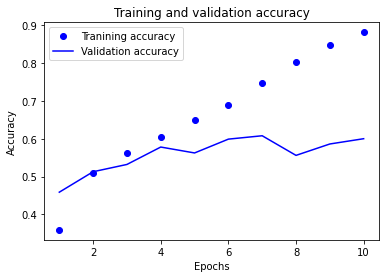

In [ ]:
plot_acc()

In [ ]:
#Plot loss
def plot_loss():
    
    plt.clf()
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(loss) + 1)
    
    plt.plot(epochs, loss, 'bo', label='Tranining loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

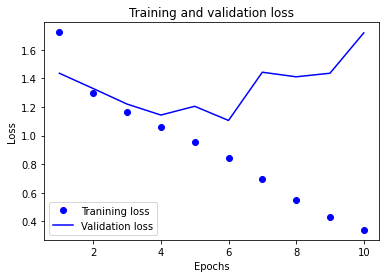

In [ ]:
plot_loss()

Plots show that the model starts overfitting and accuracy was not at expected levels. Therefore the model has been dropped and will start regularizing/tune hyperparameters to a similar model.